In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [3]:
from scipy.stats import norm

In [4]:
import statistics

In [5]:
df = pd.read_csv("hw3_Q5.txt", sep = " ", header = None, names = ["D1","D2","D3","D4","D5"], index_col = False)
data = pd.read_csv("hw3_Q5.txt", sep = " ", header = None, names = ["D1","D2","D3","D4","D5"], index_col = False)

## a

In [6]:
gm = GaussianMixture(n_components = 3, covariance_type='spherical', init_params = 'random')

In [7]:
gm.fit(df)

GaussianMixture(covariance_type='spherical', init_params='random',
                n_components=3)

In [8]:
gm.means_

array([[ 1.05250251e-02,  4.16618640e-03,  1.35683863e-02,
         1.00207924e-02, -2.47443547e-02],
       [-3.06176428e+00, -3.96696240e+00, -5.02048769e+00,
        -5.02021252e+00, -6.00420335e+00],
       [ 2.99520441e+00,  3.97929290e+00,  4.93552594e+00,
         4.95000613e+00,  6.02926365e+00]])

In [9]:
u1 = gm.means_[0]
print('The means u1 is', u1)

The means u1 is [ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]


In [10]:
u2 = gm.means_[1]
print('The means u2 is', u2)

The means u2 is [-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]


In [11]:
u3 = gm.means_[2]
print('The means u3 is', u3)

The means u3 is [2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]


In [12]:
v = np.sqrt(gm.covariances_)
print('The variances gamma1 is', v[0])

The variances gamma1 is 0.4958449228619954


In [13]:
print('The variances gamma2 is', v[1])

The variances gamma2 is 0.9848634682444027


In [14]:
print('The variances gamma3 is', v[2])

The variances gamma3 is 0.9892007698529822


## b

In [15]:
km_per = KMeans(n_clusters = 3)

In [16]:
km_per.fit(df)

KMeans(n_clusters=3)

In [17]:
km_per.n_iter_

2

In [18]:
km_rand = KMeans(n_clusters = 3, init = "random")

In [19]:
km_rand.fit(df)

KMeans(init='random', n_clusters=3)

In [20]:
km_rand.n_iter_

3

Apparently, random initialization and pre initialization from K-Means take different times of iterations to converge

## c

In [21]:
label = gm.fit_predict(df)

In [22]:
df["predicted_cluster"]=label

In [23]:
df

,D1,D2,D3,D4,D5,predicted_cluster
0,3.805564,5.384041,4.564335,4.266158,7.348113,2
1,-2.545971,-2.601637,-2.910390,-3.785392,-6.392758,1
2,-4.667780,-3.411962,-3.442990,-4.115973,-8.019540,1
3,0.766852,-0.386541,-0.200627,-0.057678,0.505778,0
4,-0.207983,-0.104326,0.016167,0.368387,-0.096917,0
...,...,...,...,...,...,...
2995,3.138888,3.903238,5.403115,5.628149,6.567997,2
2996,-2.640751,-5.582494,-2.756398,-6.422795,-4.077675,1
2997,2.313257,5.220735,4.589131,4.117231,5.454372,2
2998,-2.515320,-4.219420,-5.240284,-5.228420,-5.342212,1


[Text(0.5, 1.0, 'plot for x1 and x2')]

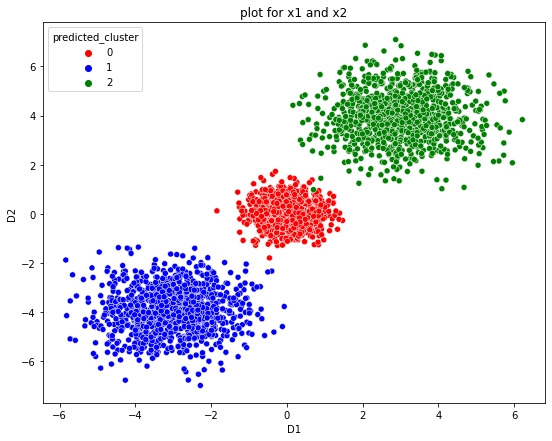

In [24]:
plt.figure(figsize=(9,7))
sns.scatterplot(data = df, 
                x = df['D1'],
                y = df['D2'], 
                hue = "predicted_cluster",
                palette=["red","blue","green"]).set(title = "plot for x1 and x2")

[Text(0.5, 1.0, 'plot for x3 and x4')]

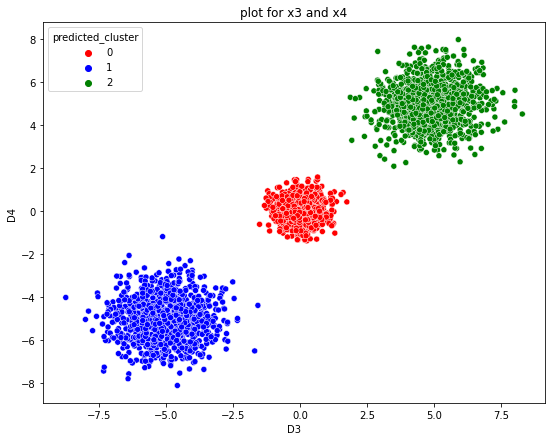

In [25]:
plt.figure(figsize=(9,7))
sns.scatterplot(data = df, 
                x = df['D3'],
                y = df['D4'], 
                hue = "predicted_cluster",
                palette=["red","blue","green"]).set(title = "plot for x3 and x4")

[Text(0.5, 1.0, 'plot for x4 and x5')]

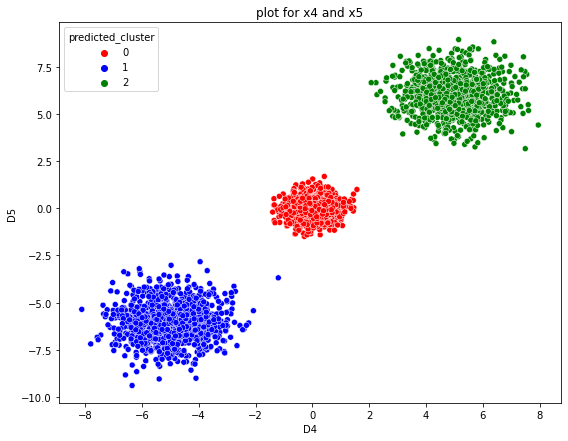

In [26]:
plt.figure(figsize=(9,7))
sns.scatterplot(data = df, 
                x = df['D4'],
                y = df['D5'], 
                hue = "predicted_cluster",
                palette=["red","blue","green"]).set(title = "plot for x4 and x5")

## d

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
plt.style.use('seaborn')
from sklearn import mixture

In [28]:
# update W
def update_W(data, Mu, Var, Pi):
    n_points, n_clusters = len(data), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(data, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W


# update pi
def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi


# calculate loglikelihoood function
def logLH(data, Pi, Mu, Var):
    n_points, n_clusters = len(data), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(data, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))

# plot the clusterings
def plot_clusters(X, Mu, Var, Mu_true=None, Var_true=None):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 5, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)
    if (Mu_true is not None) & (Var_true is not None):
        for i in range(n_clusters):
            plot_args = {'fc': 'None', 'lw': 5, 'edgecolor': colors[i], 'alpha': 0.5}
            ellipse = Ellipse(Mu_true[i], 3 * Var_true[i][0], 3 * Var_true[i][1], **plot_args)
            ax.add_patch(ellipse)         
    plt.show()

# update mu
def update_Mu(data, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 5))
    for i in range(n_clusters):
        Mu[i] = np.average(data, axis=0, weights=W[:, i])
    return Mu


# update Var
def update_Var(data, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 5))
    for i in range(n_clusters):
        Var[i] = np.average((data - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var


In [29]:
#initialization
true_Mu=[[-3,-4,-5,-5,-6],[3,4,5,5,6],[0,0,0,0,0]]
true_Var = [np.ones(5),np.ones(5),np.ones(5)*0.25]
true_Pi = np.ones(3)/3
Mu = np.random.rand(3,5)
Var=true_Var
Pi = true_Pi
n_clusters=3
n_points = len(data)
W = np.ones((n_points, n_clusters)) / n_clusters 
    
loglh = []
iter=1
diff=None
while len(loglh)==0 or diff>=0.001:
    newlog=logLH(data, Pi, Mu, Var)
    loglh.append(newlog)
    if len(loglh)!=1:
        diff=abs(loglh[-1]-loglh[-2])
    else:
        diff=abs(loglh[-1])
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    print('step %1d:log-likehood:%.4f'%(iter,loglh[-1]))
    Var = update_Var(data, Mu, W)
    iter+=1 

print(np.round(Mu,4))
print(true_Mu)

step 1:log-likehood:-44.3113
step 2:log-likehood:-10.2410
step 3:log-likehood:-6.9994
step 4:log-likehood:-6.9785
step 5:log-likehood:-6.9785
[[ 2.9952e+00  3.9793e+00  4.9355e+00  4.9500e+00  6.0293e+00]
 [-3.0618e+00 -3.9670e+00 -5.0205e+00 -5.0202e+00 -6.0042e+00]
 [ 1.0500e-02  4.2000e-03  1.3600e-02  1.0000e-02 -2.4700e-02]]
[[-3, -4, -5, -5, -6], [3, 4, 5, 5, 6], [0, 0, 0, 0, 0]]


e

In [30]:
#initialization
true_Mu=[[-3,-4,-5,-5,-6],[3,4,5,5,6],[0,0,0,0,0]]
true_Var = [np.ones(5),np.ones(5),np.ones(5)*0.25]
true_Pi=np.ones(3)/3

Mu = np.random.rand(3,5)
Var=true_Var
Pi = np.random.rand(3)
Pi = Pi/sum(Pi)
n_points = len(data)
W = np.ones((n_points, n_clusters)) / n_clusters 
#Pi = W.sum(axis=0) / W.sum()
    
loglh = []
iter=1
diff=None
while len(loglh)==0 or diff>=0.001:
    newlog=logLH(data, Pi, Mu, Var)
    loglh.append(newlog)
    if len(loglh)!=1:
        diff=abs(loglh[-1]-loglh[-2])
    else:
        diff=abs(loglh[-1])
    print('step %1x: log-likehood:%.4f'%(iter,loglh[-1]),'Pi:',Pi)
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)
    iter+=1 

print(np.round(Mu,4))
print(true_Mu)
print(np.round(Pi,4))
print(true_Pi)

step 1: log-likehood:-41.6272 Pi: [0.34797088 0.42444785 0.22758127]
step 2: log-likehood:-9.2146 Pi: [0.49038822 0.41908448 0.0905273 ]
step 3: log-likehood:-7.0494 Pi: [0.3417465  0.33397229 0.32428121]
step 4: log-likehood:-6.9785 Pi: [0.33333333 0.33333333 0.33333333]
step 5: log-likehood:-6.9785 Pi: [0.33333333 0.33333333 0.33333333]
[[-3.0618e+00 -3.9670e+00 -5.0205e+00 -5.0202e+00 -6.0042e+00]
 [ 2.9952e+00  3.9793e+00  4.9355e+00  4.9500e+00  6.0293e+00]
 [ 1.0500e-02  4.2000e-03  1.3600e-02  1.0000e-02 -2.4700e-02]]
[[-3, -4, -5, -5, -6], [3, 4, 5, 5, 6], [0, 0, 0, 0, 0]]
[0.3333 0.3333 0.3333]
[0.33333333 0.33333333 0.33333333]
